# **Project Name**    -  **SALES DATA ANALYSIS**

**Project Type** - DATA ANALYSIS

**Author** - TANMAY DHAR

# **Project Summary**

The sales data analysis project aims to extract valuable insights from a comprehensive dataset to facilitate data-driven decision-making in business. The primary goals include understanding total sales, identifying sales trends over time, determining best-selling products, and creating visualizations to present the findings effectively.

# **Problem Statement**

Many businesses struggle to make informed decisions due to a lack of understanding of their sales data. Without proper analysis, they face challenges in identifying sales trends, optimizing product offerings, and maximizing revenue potential. The problem is compounded by the complexity of handling large datasets efficiently.

Therefore, there is a need to develop a streamlined approach to sales data analysis that allows businesses to extract valuable insights, improve decision-making, and ultimately enhance sales performance. This involves overcoming obstacles such as data complexity, limited resources, and the need for actionable recommendations.

#### **Define Your Business Objectives**

1. Gain actionable insights from sales data.
2. Improve decision-making processes.
3. Identify sales trends and opportunities.
4. Optimize product offerings and pricing strategies.
5. Maximize revenue potential.
6. Enhance sales performance.



# **GOAL**

Use sales data analysis to find patterns, best-selling items, and revenue indicators to help in business decision-
making.

This project will require you to delve into a sizable sales dataset in order to glean insightful information. In order
to successfully convey your findings, you will compute revenue measures like
1. total sales,
2. analyze sales trends over time,
3. determine the best-selling products, and build visualizations.
This assignment demonstrates your capacity to work with and extract knowledge from huge datasets,
empowering you to provide data-driven suggestions for improving sales tactics.

# **Data Collection**

For this **SALES DATA ANALYSIS**, I am using ECOMM DATA set which is providing by the Afama Technolohies.

**Data Set Link** - https://drive.google.com/drive/folders/1SBScS_ixyyh4VtI3DaCbmgvCflgdyyJv

# **Let's Begin !**

In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

In [ ]:
# Reading the ECOMM DATA set
orders = pd.read_excel('ECOMM DATA.xlsx', sheet_name='Orders')
returns = pd.read_excel('ECOMM DATA.xlsx', sheet_name='Returns')
people = pd.read_excel('ECOMM DATA.xlsx', sheet_name='People')

**Cleaning & Preprocessing**

In [ ]:
# First look of the data set
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
returns.head()


,Returned,Order ID,Market
0,Yes,MX-2013-168137,LATAM
1,Yes,US-2011-165316,LATAM
2,Yes,ES-2013-1525878,EU
3,Yes,CA-2013-118311,United States
4,Yes,ES-2011-1276768,EU


In [ ]:
people.head()

,Person,Region
0,Anna Andreadi,Central
1,Chuck Magee,South
2,Kelly Williams,East
3,Matt Collister,West
4,Deborah Brumfield,Africa


In [ ]:
# dataset columns
orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [ ]:
returns.columns

Index(['Returned', 'Order ID', 'Market'], dtype='object')

In [ ]:
people.columns

Index(['Person', 'Region'], dtype='object')

In [ ]:
# Checking number of rows & column
orders.shape

(51290, 24)

In [ ]:
returns.shape

(1173, 3)

In [ ]:
people.shape

(13, 2)

In [ ]:
# Data Set Info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  1173 non-null   object
 1   Order ID  1173 non-null   object
 2   Market    1173 non-null   object
dtypes: object(3)
memory usage: 27.6+ KB


In [ ]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  13 non-null     object
 1   Region  13 non-null     object
dtypes: object(2)
memory usage: 336.0+ bytes


In [ ]:
# Checking Douplicates
orders.duplicated().sum()

0

In [ ]:
returns.duplicated().sum()

0

In [ ]:
people.duplicated().sum()

0

In [ ]:
# Checking Null Values or Missing values
orders.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [ ]:
returns.isna().sum()

Returned    0
Order ID    0
Market      0
dtype: int64

In [ ]:
people.isna().sum()

Person    0
Region    0
dtype: int64

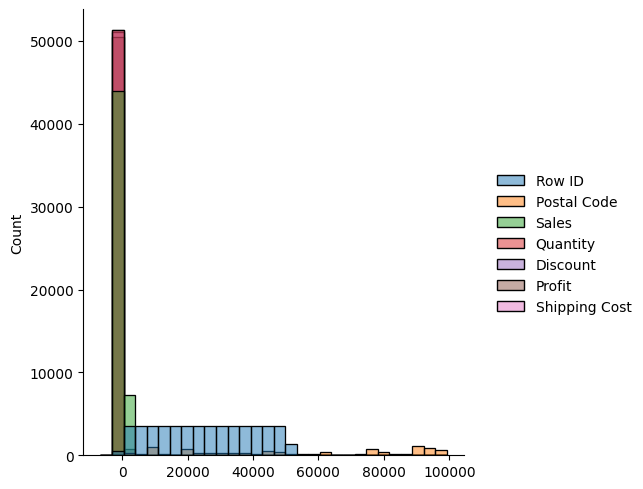

In [ ]:
# Checking outliers
sns.displot(orders, bins=30);

In [ ]:
# Describe
orders.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,51290.0,25645.5,1.0,12823.25,25645.5,38467.75,51290.0,14806.29199
Order Date,51290,2013-05-11 21:26:49.155781120,2011-01-01 00:00:00,2012-06-19 00:00:00,2013-07-08 00:00:00,2014-05-22 00:00:00,2014-12-31 00:00:00,NaN
Ship Date,51290,2013-05-15 20:42:42.745174528,2011-01-03 00:00:00,2012-06-23 00:00:00,2013-07-12 00:00:00,2014-05-26 00:00:00,2015-01-07 00:00:00,NaN
Postal Code,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,51290.0,246.490581,0.444,30.758625,85.053,251.0532,22638.48,487.565361
Quantity,51290.0,3.476545,1.0,2.0,3.0,5.0,14.0,2.278766
Discount,51290.0,0.142908,0.0,0.0,0.0,0.2,0.85,0.21228
Profit,51290.0,28.610982,-6599.978,0.0,9.24,36.81,8399.976,174.340972
Shipping Cost,51290.0,26.375818,0.002,2.61,7.79,24.45,933.57,57.29681


In [ ]:
# Handling Missing Values: The column Postal Code has 41296 missing values so I am dropping the column because it is not useable for analysis.
orders.drop(columns=['Postal Code'], inplace=True)


After dropping the column all data is ready and well structured so I am saving the file next.

In [ ]:
# Save the cleaned dataset
with pd.ExcelWriter('ECOMMM DATA.xlsx') as writer:
    # Write each DataFrame to a separate sheet
    orders.to_excel(writer, sheet_name='Orders', index=False)
    returns.to_excel(writer, sheet_name='Returns', index=False)
    people.to_excel(writer, sheet_name='People', index=False)

# **Visualizing Using Tableau Public**

Tableau Public Link - https://public.tableau.com/app/profile/tanmay.dhar3211/viz/SALESDATAANALYSIS_17159530288020/Dashboard1?publish=yes

# **Projict Image**

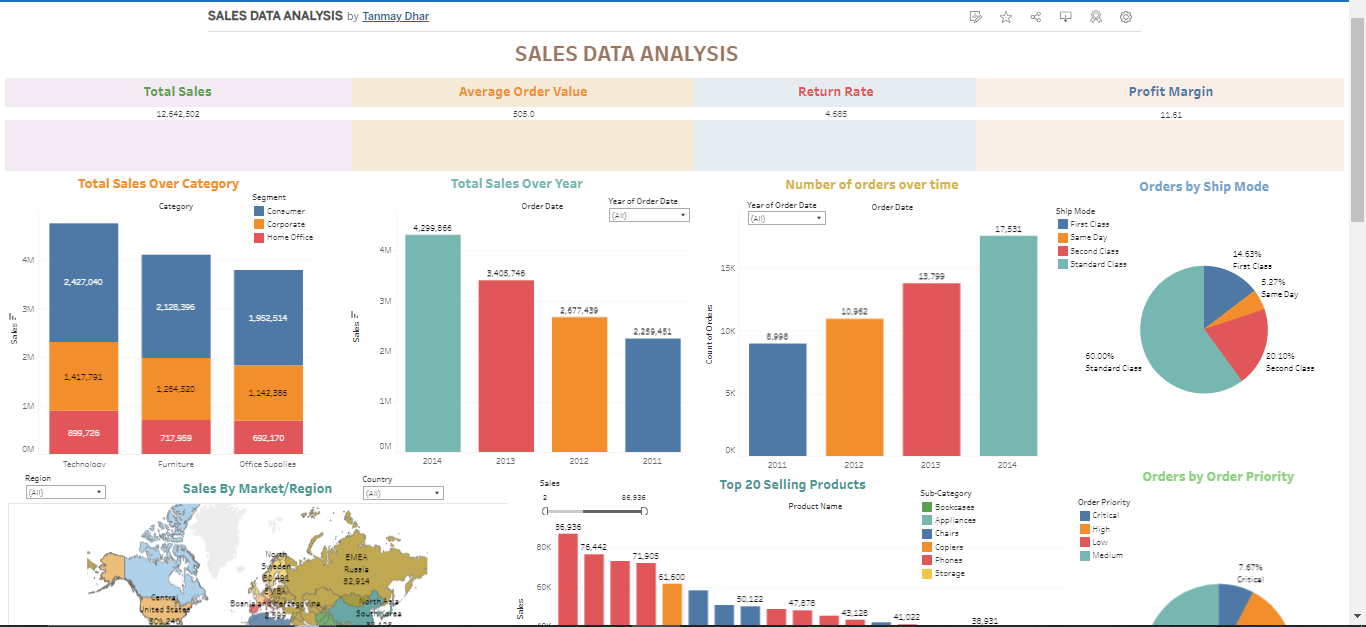

# **Conclusion**

In conclusion, this project has provided a comprehensive view of total sales, avarage order value, return rates and profit margin. It gives the graphical view of the sales by the region or market. By the visualization we can clearly identify that **Apple Smart Phone Full Size** is the most selling product. Other visualization can clearify the sales analysis according to the data.Using Tableau, empowers stakeholders with valuable insights to make informed decisions aimed at enhancing sales performance and achieving business objectives. By leveraging these insights, the business can better understand customer behavior, capitalize on market opportunities, and stay ahead of the competition in a dynamic marketplace.